In [1]:
# %matplotlib inline

import test
# import datetime as d
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scipy.signal as sg
import pandas as pd
from scipy import stats as st
from sklearn.metrics import accuracy_score as acc
from sklearn import model_selection as ms
import numpy as np

pd.plotting.register_matplotlib_converters()

## Get Data


Starting dump run for date range 2020-01-01 00:00:00 - 2021-08-13 00:00:00 @interval=1hour


Data acquired. Total data points:14159

Creating Parameter system of order:3...

Parameters are ready...

- Creating addtional features...

Data modelling complete...



C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


- Performing Fourier Transform for v..

- Performing Fourier Transform for c..



c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(dates_idx,df1['dv1t_o'],xdate=False,linestyle='-',label='dv1t_o',marker='')
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(dates_idx,df1.x1_pr,xdate=False,linestyle='dotted',marker='',linewidth=0.8,label='x1_pr')
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py:46: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot_date(dates_idx,df1.x1_gn,xdate=False,linestyle='dotted',marker='',linewidth=0.8,label='x1_gn')
c:\Users\mwill\Coupled-Oscillator-Analyzer\plots.py

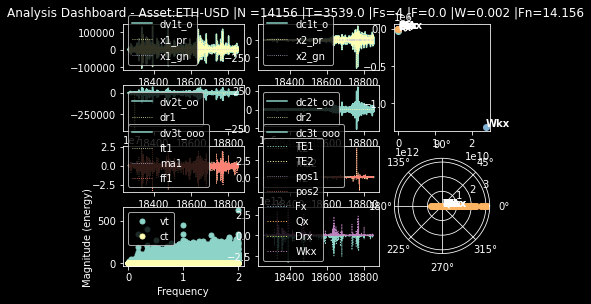

- Dump Complete...


In [2]:
Fs = 4
data_o = test.testbed(start=dt(2020,1,1),stop=dt(2021,8,13),Fs=Fs,interval='1hour')

### Variables

In [3]:
columns = ['dv1t_o','dv2t_oo','dv3t_ooo','vf_t','v_fft','dr1','ma1','ft1','wrk1','TE1','KE1','PE1','w1','w1_n','rf1','q1','x1_gn','x1_pr','wrk1','idpos1','idpos2'
            ,'Ftm','Fta','Ftt','Ffm','Ffa','Fft','Mam','Maa','Mat','Qfm','Qfa','Qft','Pxm','Pxa','Pxt','Wkm','Wka','Wkt','Drm','Dra','Drt','wrk2'
            ,'x2_pr','x2_gn','q2','rf2','w2_n','w2','PE2','KE2','TE2','wrk2','ft2','ma2','dr2','c_fft','cf_t','dc3t_ooo','dc2t_oo','dc1t_o']

In [4]:
data_o.columns.values

array(['l', 'h', 'o', 'c', 'v', 'idposc', 'c1t_1', 'dc1t_o', 'c2t_1',
       'dc2t_o', 'c2to_1', 'dc2t_oo', 'c3t_1', 'dc3t_o', 'c3to_1',
       'dc3t_oo', 'c3too_1', 'dc3t_ooo', 'v1t_1', 'dv1t_o', 'v2t_1',
       'dv2t_o', 'v2to_1', 'dv2t_oo', 'v3t_1', 'dv3t_o', 'v3to_1',
       'dv3t_oo', 'v3too_1', 'dv3t_ooo', 'idpos1', 'idpos2', 'al1', 'al2',
       'x1_gn', 'x2_gn', 'x1_pr', 'x2_pr', 'al1n', 'al2n', 'ft1', 'ft2',
       'ff1', 'ff2', 'k1', 'k2', 'ac1', 'ac2', 'ma1', 'ma2', 'w1_n',
       'w2_n', 'dr1', 'dr2', 'w1', 'w2', 'rf1', 'rf2', 'fr1', 'fr2',
       'lmda1', 'lmda2', 'q1', 'q2', 'PE1', 'KE1', 'TE1', 'PE2', 'KE2',
       'TE2', 'wrk1', 'wrk2', 'pwr1', 'pwr2', 'Pxm', 'Pxa', 'Pxt', 'Ftm',
       'Fta', 'Ftt', 'Mam', 'Maa', 'Mat', 'Ffm', 'Ffa', 'Fft', 'Qfm',
       'Qfa', 'Qft', 'Drm', 'Dra', 'Drt', 'Wkm', 'Wka', 'Wkt', 'Pwm',
       'Pwa', 'Pwt', 'Trq', 'v_fft', 'fft_freq', 'vf_t', 'c_fft', 'cf_t'],
      dtype=object)

In [5]:
data_o[['w1_n','w1','lmda1','dr1','al1','k1','k2','al2','dr2','lmda2','w2','w2_n']].describe()

,w1_n,w1,lmda1,dr1,al1,k1,k2,al2,dr2,lmda2,w2,w2_n
count,1.415600e+04,14156.000000,1.415600e+04,14156.000000,14156.000000,14156.00000,14156.000000,14156.000000,14156.000000,14156.000000,14156.000000,1.415600e+04
mean,1.256637e+01,14.749799,-3.873774e+02,-30.826512,-4.906192,157.91367,12.557977,0.999744,1.771407,6.277379,0.002831,3.543724e+00
std,3.552839e-15,82.104941,4.482895e+04,3567.374189,567.765236,0.00000,0.000000,0.049816,0.088267,0.312796,0.097800,8.882098e-16
min,1.256637e+01,0.000000,-5.315457e+06,-422990.639279,-67321.051123,157.91367,12.557977,-1.045065,-1.851711,-6.561953,0.000000,3.543724e+00
25%,1.256637e+01,0.000000,1.217224e+01,0.968636,0.154163,157.91367,12.557977,0.998665,1.769496,6.270603,0.000000,3.543724e+00
50%,1.256637e+01,0.000000,8.436884e+01,6.713859,1.068544,157.91367,12.557977,0.999959,1.771789,6.278731,0.000000,3.543724e+00
75%,1.256637e+01,2.126270,1.450825e+02,11.545299,1.837491,157.91367,12.557977,1.001045,1.773714,6.285551,0.000000,3.543724e+00
max,1.256637e+01,8172.891919,1.486034e+05,11825.480098,1882.083612,157.91367,12.557977,2.436739,4.317564,15.300254,5.984290,3.543724e+00


In [6]:
sig = data_o[columns]

In [7]:
# Normalize training data
sign = sig.copy()

sign.reset_index(drop=True,inplace=True)

for col in sign:
        if col not in ['idpos1','idpos2']:
            sign[col] = (sign[col]-sign[col].mean())/sign[col].std()
            sign[col] = sign[col].replace([np.inf, -np.inf], np.nan)
            sign[col] = sign[col].fillna(np.abs(sign[col]).max())

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [8]:
sign.drop(['idpos1','idpos2'],axis=1).describe()

,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04+0.000000e+00j,1.415600e+04+0.000000e+00j,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04,...,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04,1.415600e+04+0.000000e+00j,1.415600e+04+0.000000e+00j,1.415600e+04,1.415600e+04,1.415600e+04
mean,8.258441e-18,-6.038936e-19,5.638954e-18,6.776156e-18-8.470391e-33j,-1.003875e-17+1.806975e-17j,-3.011625e-18,1.003875e-18,-6.023250e-18,2.007750e-18,-2.007750e-17,...,-8.031000e-18,-2.509688e-19,4.015500e-18,3.452389e-17,1.240790e-15,1.124340e-16+0.000000e+00j,-3.011625e-18-6.687151e-33j,-7.654547e-18,5.568369e-18,2.007750e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00+0.000000e+00j,1.000000e+00+0.000000e+00j,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00+0.000000e+00j,1.000000e+00+0.000000e+00j,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.123461e+01,-1.555080e+01,-1.375600e+01,-1.123461e+01+1.549362e-15j,-3.160991e+01-4.213263e-01j,-1.185633e+02,-5.949762e+01,-1.301886e+01,-8.163976e+00,-3.019180e+01,...,-3.428222e+01,-1.158995e+02,-4.282358e+01,-1.525875e+00,-4.104704e+01,-4.092565e+01+7.577333e+00j,-2.191482e+01-4.520609e-15j,-1.549989e+01,-1.979368e+01,-2.191482e+01
25%,-2.495024e-01,-2.031973e-01,-2.471120e-01,-2.495024e-01-3.477117e-16j,-2.903152e+00-3.585295e+00j,8.912760e-03,-8.406541e-03,-1.707133e-01,-1.407146e-01,1.199960e-01,...,1.132884e-01,-3.697810e-03,-6.108038e-03,-9.711056e-01,-2.166120e-02,-7.723946e+00-2.827590e+00j,-1.143797e-01+2.176970e-16j,-1.316918e-01,-1.332122e-01,-1.143797e-01
50%,-1.689845e-02,4.206141e-02,4.403296e-03,-1.689845e-02-7.041682e-16j,-1.364331e-02+4.363129e+00j,1.052325e-02,-8.403923e-03,1.305002e-01,-1.353744e-01,1.634636e-01,...,1.543677e-01,-3.617199e-03,5.347752e-03,3.280860e-02,4.323530e-03,-4.218115e-02+8.881784e-15j,-5.096317e-03-4.708519e-16j,-3.681509e-04,-2.021098e-03,-5.096317e-03
75%,2.130275e-01,2.887726e-01,2.587460e-01,2.130275e-01+3.772848e-16j,2.875299e+00-4.646529e-01j,1.187759e-02,-8.402163e-03,3.203915e-01,-9.681757e-02,1.714908e-01,...,1.614214e-01,-1.835199e-03,1.667650e-02,1.008257e+00,2.612677e-02,7.615213e+00-3.798131e+00j,1.195716e-01+3.030984e-16j,1.305103e-01,1.212076e-01,1.195716e-01
max,1.433498e+01,8.942786e+00,1.346350e+01,1.433498e+01+2.703296e-18j,5.971113e+01-1.822353e-15j,3.323539e+00,5.948119e+01,9.479110e+00,3.257318e+01,1.855064e-01,...,6.014937e-01,6.980148e+00,9.349367e+01,1.466577e+00,2.884592e+01,4.331246e+01+2.457901e+00j,1.085109e+01+1.510498e-15j,2.241769e+01,2.253631e+01,1.085109e+01


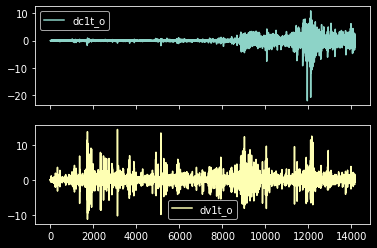

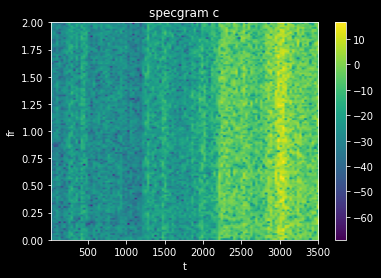

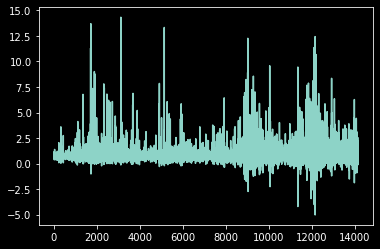

In [9]:
sign[['dc1t_o','dv1t_o']].plot(subplots=True)
plt.show()

Spc, fr, t,im  = plt.specgram(sign.dc1t_o,Fs=Fs)
plt.title('specgram c')
plt.xlabel('t')
plt.ylabel('fr')
plt.colorbar()
plt.show()

np.logaddexp(sign.dv1t_o,sign.dc1t_o).plot()
plt.show()

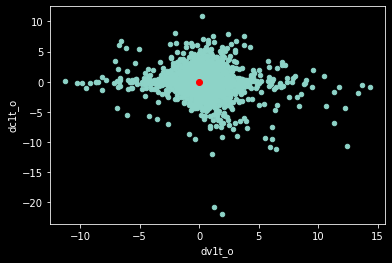

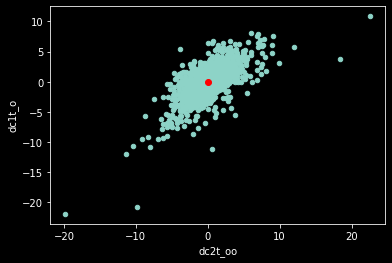

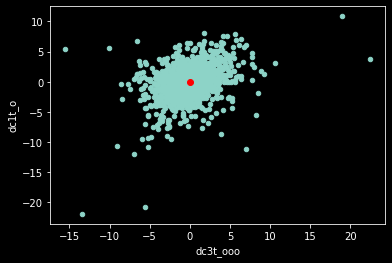

Text(0.5, 0, 'dc1t_o-1')

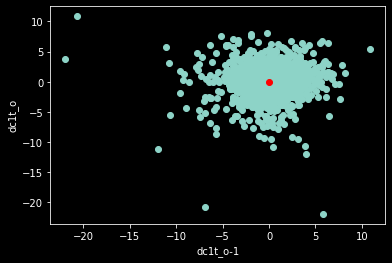

In [10]:
sign.plot.scatter('dv1t_o','dc1t_o')
plt.plot(sign.dv1t_o.mean(),sign.dc1t_o.mean(),color='r',marker='o')
plt.show()
sign.plot.scatter('dc2t_oo','dc1t_o')
plt.plot(sign.dv2t_oo.mean(),sign.dc2t_oo.mean(),color='r',marker='o')
plt.show()
sign.plot.scatter('dc3t_ooo','dc1t_o')
plt.plot(sign.dv3t_ooo.mean(),sign.dc3t_ooo.mean(),color='r',marker='o')
plt.show()
plt.scatter(sign['dc1t_o'].shift(1),sign['dc1t_o'])
plt.plot(sign.dc1t_o.mean(),sign.dc1t_o.shift(1).mean(),color='r',marker='o')
plt.ylabel('dc1t_o')
plt.xlabel('dc1t_o-1')

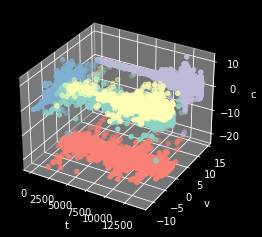

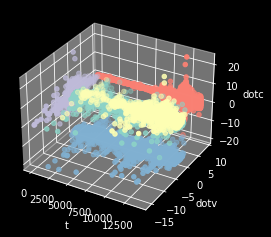

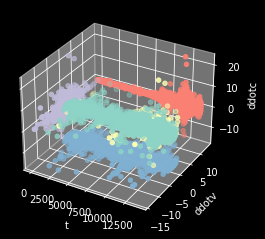

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index[sign.idpos1==0],sign.dv1t_o[sign.idpos1==0],sign.dc1t_o[sign.idpos1==0])
ax.scatter(sign.index[sign.idpos1==1],sign.dv1t_o[sign.idpos1==1],sign.dc1t_o[sign.idpos1==1])
ax.scatter(sign.index,sign.dv1t_o.max(),sign.dc1t_o)
ax.scatter(sign.index,sign.dv1t_o,sign.dc1t_o.min())
ax.scatter(sign.index[0],sign.dv1t_o,sign.dc1t_o)
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('v')
ax.zaxis.label.set_text('c')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index[sign.idpos1==0],sign.dv2t_oo[sign.idpos1==0],sign.dc2t_oo[sign.idpos1==0])
ax.scatter(sign.index[sign.idpos1==1],sign.dv2t_oo[sign.idpos1==1],sign.dc2t_oo[sign.idpos1==1])
ax.scatter(np.zeros(len(sign)),sign.dv2t_oo,sign.dc2t_oo)
ax.scatter(sign.index,sign.dv2t_oo.max(),sign.dc2t_oo)
ax.scatter(sign.index,sign.dv2t_oo,sign.dc2t_oo.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('dotv')
ax.zaxis.label.set_text('dotc')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(sign.index[sign.idpos1==0],sign.dv3t_ooo[sign.idpos1==0],sign.dc3t_ooo[sign.idpos1==0])
ax.scatter(sign.index[sign.idpos1==1],sign.dv3t_ooo[sign.idpos1==1],sign.dc3t_ooo[sign.idpos1==1])
ax.scatter(np.zeros(len(sign)),sign.dv3t_ooo,sign.dc3t_ooo)
ax.scatter(sign.index,sign.dv3t_ooo.max(),sign.dc3t_ooo)
ax.scatter(sign.index,sign.dv3t_ooo,sign.dc3t_ooo.min())
ax.xaxis.label.set_text('t')
ax.yaxis.label.set_text('ddotv')
ax.zaxis.label.set_text('ddotc')

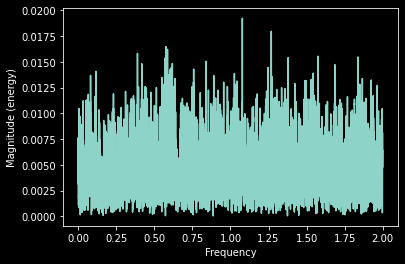

min energy: 3.89706996378054e-05 @ 0.8866911556936988 Hz / 5.571244841460736 Rad/s
max energy: 0.019234319078857476 @ 1.077988132240746 Hz / 6.77319919380902 Rad/s
mean energy: 0.005074716895809131 @ 0.016953941791466517 Hz / 0.10652475796292038 Rad/s


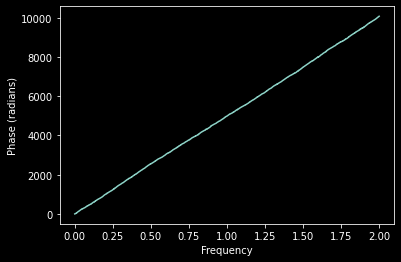

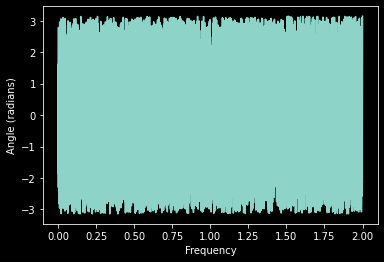

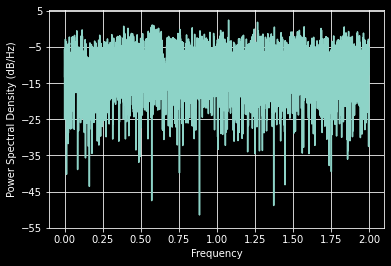

max psd dB/Hz: 1.7455900252328127 @ 1.077988132240746 Hz / 6.77319919380902 Rad/s
min psd dB/Hz: 7.165805638443646e-06 @ 0.8866911556936988 Hz / 5.571244841460736 Rad/s
mean psd dB/Hz: 0.15683229753339226 @ [0.08448714 0.26335123] Hz / [0.53084838 1.65468457] Rad/s


In [12]:
s,fm,l = plt.magnitude_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

de = st.describe(s)
print('min energy:',de.minmax[0],'@',fm[s==s.min()][0],'Hz','/',2*np.pi*fm[s==s.min()][0],'Rad/s')
print('max energy:',de.minmax[1],'@',fm[s==s.max()][0],'Hz','/',2*np.pi*fm[s==s.max()][0],'Rad/s')
print('mean energy:',de.mean,'@',fm[s.round(4)==s.mean().round(4)][0],'Hz','/',2*np.pi*fm[s.round(4)==s.mean().round(4)][0],'Rad/s')

p,fp,l = plt.phase_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

a,fa,l = plt.angle_spectrum(sign.dc1t_o,Fs=Fs)
plt.show()

pwr,fr = plt.psd(sign.dc1t_o,noverlap=len(sign)//2,NFFT=len(sign),Fs=Fs)
plt.show()
print('max psd dB/Hz:',pwr.max(),'@',fr[pwr==pwr.max()][0],'Hz','/',2*np.pi*fr[pwr==pwr.max()][0],'Rad/s')
print('min psd dB/Hz:',pwr.min(),'@',fr[pwr==pwr.min()][0],'Hz','/',2*np.pi*fr[pwr==pwr.min()][0],'Rad/s')
print('mean psd dB/Hz:',pwr.mean(),'@',fr[pwr.round(4)==pwr.mean().round(4)],'Hz','/',2*np.pi*fr[pwr.round(4)==pwr.mean().round(4)],'Rad/s')

### Magnitude Squared Coherence

In [13]:
de

DescribeResult(nobs=7079, minmax=(3.89706996378054e-05, 0.019234319078857476), mean=0.005074716895809131, variance=7.4902088088717295e-06, skewness=0.7040845448071278, kurtosis=0.4149680252690571)

Max Coherence: 0.2694566861667708 @ 0.078125 Hz
Min Coherence: 0.00030904239267131575 @ 0.59375 Hz
Mean Coherence 0.04252325367177517 @ 0.40625 Hz
Variance: 0.0022287622596703334
Kurtosis: 5.642411920728161


count    129.000000
mean       0.042523
std        0.047394
min        0.000309
25%        0.010019
50%        0.027279
75%        0.058128
max        0.269457
dtype: float64

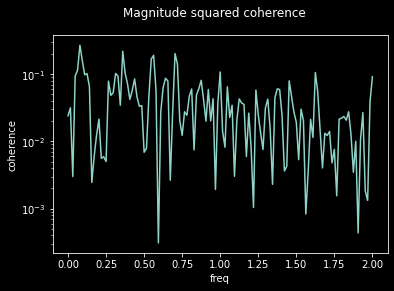

In [14]:
# Magnitude squared coherence Cxy = abs(Pxy)**2/(Pxx*Pyy)
# where Pxx and Pyy are power spectral densities and Pxy is the
# cross spectral density.
fc,Cxy = sg.coherence(sign.dc1t_o,sign.dv1t_o,fs=Fs)

plt.semilogy(fc,Cxy)
plt.suptitle('Magnitude squared coherence')
plt.xlabel('freq')
plt.ylabel('coherence')

print('Max Coherence:',Cxy.max(),'@',fc[Cxy==Cxy.max()][0],'Hz')
print('Min Coherence:',Cxy.min(),'@',fc[Cxy==Cxy.min()][0],'Hz')
print('Mean Coherence',Cxy.mean(),'@',fc[Cxy.round(2)==np.round(Cxy.mean(),2)][0],'Hz')
print('Variance:',np.var(Cxy))
print('Kurtosis:',st.kurtosis(Cxy))
pd.Series(Cxy).describe()

### Covariance Leaderboard

In [15]:
cov=sign.cov()
cov_ld = cov.abs() > cov.quantile(0.44)
cov_ldbrd = cov[cov_ld].dropna()
cov_ldbrd

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\internals\managers.py:1517: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
v_fft,0.028094,-0.012807,-0.016832,0.028094,24.455222,0.037627,0.031173,0.046266,0.054484,0.012648,...,-0.012195,-0.065739,0.068392,0.000137,0.022763,-6.730354,0.004882,-0.046043,-0.022024,0.004882
TE1,-0.013627,-0.261394,-0.439013,-0.013627,0.012648,-0.001289,-0.001699,0.533873,-0.504113,1.000000,...,0.392675,-0.000464,0.003018,-0.015594,0.001192,0.031411,0.027793,0.029379,0.022230,0.027793
PE1,0.013281,0.260619,0.438219,0.013281,-0.012670,0.001286,0.001706,-0.533753,0.504670,-0.999999,...,-0.393510,0.000414,-0.003034,0.015579,-0.001187,-0.031549,-0.027846,-0.029334,-0.022184,-0.027846
w1,-0.136439,-0.180564,-0.162704,-0.136439,-0.047549,-0.860759,-0.001510,0.009028,-0.009882,0.013847,...,-0.020303,-0.069110,-0.139805,-0.015210,0.003664,0.000791,0.005699,0.012651,0.016699,0.005699
rf1,-0.136439,-0.180564,-0.162704,-0.136439,-0.047549,-0.860759,-0.001510,0.009028,-0.009882,0.013847,...,-0.020303,-0.069110,-0.139805,-0.015210,0.003664,0.000791,0.005699,0.012651,0.016699,0.005699
x1_gn,0.002927,0.007988,0.012556,0.002927,-0.017490,0.003061,0.009920,-0.016731,-0.006309,-0.005282,...,0.009021,-0.002325,-0.003005,-0.000715,0.006816,-0.075472,-0.005757,0.010240,0.002571,-0.005757
Ftm,0.062988,0.269297,0.419082,0.062988,-0.037055,0.002238,0.004544,-0.521026,0.559078,-0.842881,...,-0.494367,-0.005573,-0.005018,0.012803,-0.005138,-0.015444,-0.034229,-0.032030,-0.026342,-0.034229
Fta,-0.006407,0.012193,0.016328,-0.006407,-0.011329,0.008664,0.005217,-0.011829,-0.001368,0.001648,...,0.007052,-0.004996,0.067485,-0.010829,-0.023633,0.030544,0.140036,-0.011015,0.058081,0.140036
Ffm,0.062988,0.269297,0.419082,0.062988,-0.037055,0.002239,0.004544,-0.521026,0.559078,-0.842881,...,-0.494367,-0.005573,-0.005018,0.012803,-0.005138,-0.015444,-0.034229,-0.032030,-0.026342,-0.034229
Ffa,-0.005683,0.015040,0.019708,-0.005683,-0.004751,0.008667,0.005205,-0.015647,-0.002577,-0.001260,...,0.007996,-0.005001,0.067453,-0.099589,-0.022629,0.017963,0.139568,-0.010543,0.057713,0.139568


### Correlation Leaderboard idpos1

In [16]:
corr = sign.corrwith(sign.idpos1).sort_values(ascending=False)
corr_ldbrd = corr[corr.abs()>=corr.quantile(0.60)]
corr_ldbrd

idpos1      1.000000+0.000000j
idpos2      0.616978+0.000000j
dc1t_o      0.522923+0.000000j
cf_t        0.522923+0.000000j
x2_pr       0.522773+0.000000j
dc2t_oo     0.371598+0.000000j
Pxa         0.313017+0.000000j
dc3t_ooo    0.198504+0.000000j
Fta         0.176051+0.000000j
Ffa         0.173046+0.000000j
x1_gn       0.158063+0.000000j
Pxm         0.111551+0.000000j
Ftm         0.093533+0.000000j
Ffm         0.093533+0.000000j
Wkm         0.038770+0.000000j
PE2         0.037129+0.000000j
KE1         0.035433+0.000000j
KE2         0.035433+0.000000j
PE1         0.033844+0.000000j
Wkt         0.031048+0.000000j
wrk1        0.031048+0.000000j
wrk1        0.031048+0.000000j
Pxt         0.024016+0.000000j
dv1t_o      0.022963+0.000000j
Qfa        -0.023632+0.000000j
TE1        -0.033808+0.000000j
TE2        -0.036602+0.000000j
dtype: complex128

### Correlation Leaderboard Idpos2

In [17]:
corr = sign.corrwith(sign.idpos2).sort_values(ascending=False)
corr_ldbrd = corr[corr.abs()>=corr.quantile(0.80)]
corr_ldbrd

idpos2      1.000000+0.000000j
idpos1      0.616978+0.000000j
x2_pr       0.265076+0.000000j
cf_t        0.264956+0.000000j
dc1t_o      0.264956+0.000000j
Pxa         0.201171+0.000000j
dc2t_oo     0.188881+0.000000j
Fta         0.165057+0.000000j
Ffa         0.162020+0.000000j
x1_gn       0.126473+0.000000j
dc3t_ooo    0.106091+0.000000j
Wka         0.073414+0.000000j
TE2         0.049282+0.000000j
PE2        -0.049534+0.000000j
Wkm        -0.050258+0.000000j
Ftm        -0.054304+0.000000j
Ffm        -0.054304+0.000000j
Pxm        -0.129286+0.000000j
dtype: complex128

### Resonance Factor Stats for idpos1 = 1

In [18]:
sign[['rf1','rf2']][sign.idpos1==1].describe()

,rf1,rf2
count,2831.000000,2831.000000
mean,-0.029041,-0.019094
std,0.495702,0.524070
min,-0.179646,-0.028943
25%,-0.179646,-0.028943
50%,-0.179646,-0.028943
75%,-0.179646,-0.028943
max,14.324877,27.855300


### Resonance Factor Stats for idpos1 = 0

In [19]:
sign[['rf1','rf2']][sign.idpos1==0].describe()

,rf1,rf2
count,11325.000000,11325.000000
mean,0.007260,0.004773
std,1.090105,1.086852
min,-0.179646,-0.028943
25%,-0.179646,-0.028943
50%,-0.179646,-0.028943
75%,-0.116535,-0.028943
max,99.362378,61.160411


### Resonnance Factor Stats for idpos2 = 1

In [20]:
sign[['rf1','rf2']][sign.idpos2==1].describe()

,rf1,rf2
count,1230.000000,1230.000000
mean,-0.082747,-0.006273
std,0.292555,0.795072
min,-0.179646,-0.028943
25%,-0.179646,-0.028943
50%,-0.179646,-0.028943
75%,-0.179646,-0.028943
max,3.810928,27.855300


### Resonance Factor Stats for idpos2 = 0

In [21]:
sign[['rf1','rf2']][sign.idpos2==0].describe()

,rf1,rf2
count,12926.000000,12926.000000
mean,0.007874,0.000597
std,1.042263,1.017375
min,-0.179646,-0.028943
25%,-0.179646,-0.028943
50%,-0.179646,-0.028943
75%,-0.130292,-0.028943
max,99.362378,61.160411


### Rf1 Study: 0.95 < rf1 < 1.05

In [22]:
sign[(sign.rf1>.95) & (sign.rf1<1.05)].describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,60.000000,60.000000,60.000000,60.00000+0.00000j,60.000000+0.000000j,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000+0.000000j,60.00000+0.00000j,60.000000,60.000000,60.000000
mean,-0.857016,-1.073592,-0.951368,-0.857016+0.000000j,0.097274+0.874584j,-0.007784,-0.008405,0.111197,-0.188490,0.057300,...,-0.207237,-0.207760,0.122969,-0.089609,0.000605,1.3608070-1.0095820j,-0.221674+0.000000j,-0.041127,-0.138527,-0.221674
std,1.278857,1.567194,1.257555,1.278857+0.000000j,N00000000a00000000N,0.000849,0.000004,0.802051,1.131839,0.425890,...,1.523134,1.348596,0.759480,0.960782,0.069907,N000000000a000000000N,1.320368+0.000000j,1.149569,1.431828,1.320368
min,-8.535975,-10.189167,-7.716297,-8.535975+0.000000j,-9.613277+1.176053j,-0.009167,-0.008418,-2.454882,-8.163976,-2.951103,...,-11.389895,-10.455721,-1.420284,-1.520559,-0.365513,-28.250907+17.896253j,-9.542988+0.000000j,-6.011429,-9.077717,-9.542988
25%,-0.967824,-1.186499,-1.094924,-0.967824-0.000000j,-2.031274+2.954847j,-0.008470,-0.008407,-0.080108,-0.163074,0.130017,...,0.014363,-0.013464,-0.025790,-0.927309,-0.004617,-5.9009370+9.8122580j,-0.202443+0.000000j,-0.102533,-0.137099,-0.202443
50%,-0.443697,-0.563527,-0.528086,-0.443697+0.000000j,0.021318-4.472526j,-0.007954,-0.008404,0.107735,-0.137772,0.162809,...,0.131409,-0.004399,0.008632,-0.108819,0.009564,1.9257820+2.2052870j,-0.015441-0.000000j,0.027009,0.004614,-0.015441
75%,-0.247958,-0.316867,-0.283843,-0.247958+0.000000j,2.679081+1.276505j,-0.006921,-0.008403,0.397099,-0.111655,0.169244,...,0.152712,-0.003770,0.117277,0.863301,0.022861,9.4536500-9.8595800j,0.043179-0.000000j,0.153548,0.119217,0.043179
max,-0.020786,-0.027340,-0.005924,-0.020786+0.000000j,10.004366-3.157152j,-0.006363,-0.008401,4.020105,2.525227,0.172837,...,0.162220,-0.003698,5.434660,1.444102,0.196126,22.984447+3.032137j,2.225133+0.000000j,3.631954,3.938642,2.225133


### Rf1 Study: rf1 < 14.33 and idpos1 = 1

In [23]:
(sign[(sign.rf1<14.33) & (sign.idpos1==1)]).describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,2831.000000,2831.000000,2831.000000,2831.0000+0.0000j,2831.00000+0.00000j,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,...,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.00000+0.00000j,2831.00000+0.00000j,2831.000000,2831.000000,2831.000000
mean,0.045927,0.007020,-0.010598,0.045927-0.000000j,0.026514+0.065090j,0.008718,-0.008406,-0.012297,0.062096,-0.067617,...,-0.073204,0.017181,0.043637,-0.003971,0.039191,0.496623-0.189613j,1.045855-0.000000j,0.397011,0.743202,1.045855
std,1.203637,1.199156,1.188789,1.203637+0.000000j,0.274161+0.000000j,0.052580,1.581471,1.185183,0.941370,1.081824,...,0.954486,0.390045,0.991260,0.997567,1.122584,2.518786+0.000000j,1.058582+0.000000j,1.595610,1.432646,1.058582
min,-8.127581,-11.776123,-10.734222,-8.127581-0.000000j,-20.430770-4.468612j,-2.508623,-59.497615,-11.889991,-5.815965,-25.245807,...,-18.097149,-10.952055,-31.095660,-1.525871,-15.448632,-40.925653-7.577333j,0.204452+0.000000j,-15.499894,-4.717698,0.204452
25%,-0.341963,-0.274107,-0.335571,-0.341963-0.000000j,-2.729641+0.172574j,0.009076,-0.008409,-0.299461,-0.140009,0.066104,...,0.050098,-0.002915,0.016336,-0.954367,-0.060272,-7.446437-8.715071j,0.358297-0.000000j,-0.200358,0.108885,0.358297
50%,0.012282,0.081047,0.026618,0.012282+0.000000j,-0.013268+0.101190j,0.010442,-0.008406,0.126337,-0.123789,0.151663,...,0.140233,0.000558,0.046688,-0.001325,0.003555,0.686065+4.671859j,0.679251+0.000000j,0.263169,0.480277,0.679251
75%,0.409315,0.447269,0.379930,0.409315-0.000000j,2.655061+0.000000j,0.011748,-0.008403,0.438295,-0.040207,0.169405,...,0.159441,0.019414,0.115451,1.003151,0.065627,8.145856+6.111143j,1.293307+0.000000j,0.978883,1.188368,1.293307
max,10.468070,7.440728,8.617437,10.46807-0.00000j,17.888772+3.340962j,0.503990,59.481184,6.972737,17.297759,0.179032,...,0.318331,6.980148,13.623513,1.466577,28.845920,43.312463-2.457901j,10.851093+0.000000j,22.417687,22.536311,10.851093


### Rf2 Study: rf2 < 27.86 and idpos1 = 1

In [24]:
sign[(sign.rf2<27.86) & (sign.idpos1==1)].describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,2831.000000,2831.000000,2831.000000,2831.0000+0.0000j,2831.00000+0.00000j,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,...,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.00000+0.00000j,2831.00000+0.00000j,2831.000000,2831.000000,2831.000000
mean,0.045927,0.007020,-0.010598,0.045927-0.000000j,0.026514+0.065090j,0.008718,-0.008406,-0.012297,0.062096,-0.067617,...,-0.073204,0.017181,0.043637,-0.003971,0.039191,0.496623-0.189613j,1.045855-0.000000j,0.397011,0.743202,1.045855
std,1.203637,1.199156,1.188789,1.203637+0.000000j,0.274161+0.000000j,0.052580,1.581471,1.185183,0.941370,1.081824,...,0.954486,0.390045,0.991260,0.997567,1.122584,2.518786+0.000000j,1.058582+0.000000j,1.595610,1.432646,1.058582
min,-8.127581,-11.776123,-10.734222,-8.127581-0.000000j,-20.430770-4.468612j,-2.508623,-59.497615,-11.889991,-5.815965,-25.245807,...,-18.097149,-10.952055,-31.095660,-1.525871,-15.448632,-40.925653-7.577333j,0.204452+0.000000j,-15.499894,-4.717698,0.204452
25%,-0.341963,-0.274107,-0.335571,-0.341963-0.000000j,-2.729641+0.172574j,0.009076,-0.008409,-0.299461,-0.140009,0.066104,...,0.050098,-0.002915,0.016336,-0.954367,-0.060272,-7.446437-8.715071j,0.358297-0.000000j,-0.200358,0.108885,0.358297
50%,0.012282,0.081047,0.026618,0.012282+0.000000j,-0.013268+0.101190j,0.010442,-0.008406,0.126337,-0.123789,0.151663,...,0.140233,0.000558,0.046688,-0.001325,0.003555,0.686065+4.671859j,0.679251+0.000000j,0.263169,0.480277,0.679251
75%,0.409315,0.447269,0.379930,0.409315-0.000000j,2.655061+0.000000j,0.011748,-0.008403,0.438295,-0.040207,0.169405,...,0.159441,0.019414,0.115451,1.003151,0.065627,8.145856+6.111143j,1.293307+0.000000j,0.978883,1.188368,1.293307
max,10.468070,7.440728,8.617437,10.46807-0.00000j,17.888772+3.340962j,0.503990,59.481184,6.972737,17.297759,0.179032,...,0.318331,6.980148,13.623513,1.466577,28.845920,43.312463-2.457901j,10.851093+0.000000j,22.417687,22.536311,10.851093


### Rf1 Study: rf1 < 14.33 and idpos1 = 0

In [25]:
sign[(sign.rf1<14.33) & (sign.idpos1==0)].describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,11322.000000,11322.000000,11322.000000,11322000.0+0.0000j,11322000.0+0.0000j,11322.000000,11322.000000,11322.000000,11322.000000,11322.000000,...,11322.000000,11322.000000,11322.000000,11322.000000,11322.000000,11322000.0+0.0000j,11322000.0+0.0000j,11322.000000,11322.000000,11322.000000
mean,-0.011243,-0.001455,0.002918,-0.011243+0.000000j,-0.006100-0.016239j,0.009145,0.002104,0.002977,-0.015453,0.016887,...,0.018325,-0.004165,-0.006917,0.001134,-0.009803,-0.125387+0.048398j,-0.261518+0.000000j,-0.099211,-0.185888,-0.261518
std,0.941871,0.943519,0.946864,0.941871+0.000000j,1.109923+0.000000j,0.053558,0.790634,0.948183,1.013692,0.977925,...,1.010389,1.100921,0.914395,1.000562,0.966866,N00000000a00000000N,0.792642+0.000000j,0.751394,0.751364,0.792642
min,-11.234607,-15.550801,-13.756000,-11.234607+0.000000j,-31.609912-0.421326j,-1.926531,-0.009339,-13.018860,-8.163976,-30.191799,...,-34.282216,-115.899466,-7.566899,-1.525875,-41.047043,-40.925653+7.577333j,-21.914821-0.000000j,-13.438781,-19.793681,-21.914821
25%,-0.228621,-0.189860,-0.228123,-0.228621-0.000000j,-2.935278+3.712962j,0.008874,-0.008406,-0.145317,-0.140754,0.129696,...,0.124295,-0.003698,-0.008104,-0.974219,-0.015523,-7.793825-13.182946j,-0.179631-0.000000j,-0.126072,-0.163545,-0.179631
50%,-0.019716,0.036614,0.000574,-0.019716-0.000000j,-0.014941+3.403482j,0.010548,-0.008403,0.130788,-0.136576,0.165252,...,0.156150,-0.003659,0.004237,0.042837,0.004402,-0.22182-010.009270j,-0.033743+0.000000j,-0.011386,-0.022875,-0.033743
75%,0.179620,0.255739,0.235596,0.179620-0.000000j,2.941490+0.392139j,0.011902,-0.008402,0.302211,-0.106973,0.171735,...,0.161616,-0.003266,0.009270,1.009708,0.021210,7.447147-9.339583j,0.024081+0.000000j,0.070636,0.048787,0.024081
max,14.334979,8.942786,13.463504,14.334979+0.000000j,59.711130-0.000000j,3.323539,59.481187,9.479110,32.573176,0.185506,...,0.601494,4.877041,93.493668,1.466577,27.295519,43.312463+2.457901j,0.204452-0.000000j,8.523425,6.163583,0.204452


### Rf2 Study: rf2 < 27.86 and idpos1 = 0

In [26]:
sign[(sign.rf2<27.86) & (sign.idpos1==0)].describe()

C:\Users\mwill\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dv1t_o,dv2t_oo,dv3t_ooo,vf_t,v_fft,dr1,ma1,ft1,wrk1,TE1,...,TE2,wrk2,ft2,ma2,dr2,c_fft,cf_t,dc3t_ooo,dc2t_oo,dc1t_o
count,11320.000000,11320.000000,11320.000000,11320000.0+0.0000j,11320000.0+0.0000j,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,...,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320000.0+0.0000j,11320000.0+0.0000j,11320.000000,11320.000000,11320.000000
mean,-0.011485,-0.001784,0.002640,-0.011485+0.000000j,-0.007281-0.017054j,-0.002185,0.002106,0.003120,-0.015467,0.016850,...,0.018235,-0.004331,-0.010856,0.001215,0.002342,-0.124511+0.051805j,-0.261037+0.000000j,-0.098590,-0.185055,-0.261037
std,0.942165,0.943913,0.947166,0.942165+0.000000j,1.101827+0.000000j,1.117961,0.790703,0.948288,1.013793,0.978010,...,1.010488,1.101095,1.002130,1.000669,0.761915,N00000000a00000000N,0.791990+0.000000j,0.750378,0.749850,0.791990
min,-11.234607,-15.550801,-13.756000,-11.234607+0.000000j,-31.609912-0.421326j,-118.563344,-0.009339,-13.018860,-8.163976,-30.191799,...,-34.282216,-115.899466,-42.823583,-1.525875,-20.068632,-40.925653+7.577333j,-21.914821-0.000000j,-13.438781,-19.793681,-21.914821
25%,-0.229551,-0.190063,-0.228354,-0.229551-0.000000j,-2.936638-0.153935j,0.008874,-0.008406,-0.144898,-0.140754,0.129714,...,0.124266,-0.003698,-0.008102,-0.974274,-0.015411,-7.794148-9.776644j,-0.179101+0.000000j,-0.125905,-0.162787,-0.179101
50%,-0.019893,0.036583,0.000556,-0.019893+0.000000j,-0.014941+3.403482j,0.010547,-0.008403,0.130788,-0.136566,0.165252,...,0.156136,-0.003660,0.004237,0.042837,0.004416,-0.22182-010.009270j,-0.033743-0.000000j,-0.011275,-0.022875,-0.033743
75%,0.179678,0.255564,0.235443,0.179678-0.000000j,2.939293-2.260129j,0.011901,-0.008402,0.302290,-0.106960,0.171732,...,0.161612,-0.003267,0.009275,1.009708,0.021218,7.441667-2.094365j,0.024081-0.000000j,0.070636,0.049166,0.024081
max,14.334979,8.942786,13.463504,14.334979+0.000000j,59.711130-0.000000j,3.323539,59.481187,9.479110,32.573176,0.185506,...,0.601494,4.877041,93.493668,1.466577,27.295519,43.312463+2.457901j,0.204452-0.000000j,8.523425,6.163583,0.204452


### Rf Study vs dc1t_o


- Resonance Factor 1
    - Reaches its max when price changes at or close to 0
    - A bulge exists around -2.5 < dc1t_o < 2.5

- Resonance Factor 2
    - Reaches its max when price changes at or close to 0
    - For all other values of dc1t_o, at or close to 0

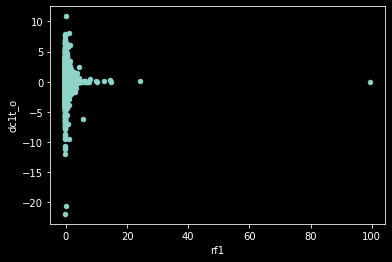

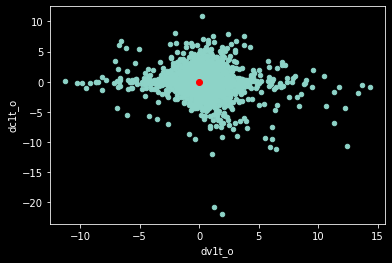

<AxesSubplot:xlabel='rf2', ylabel='dc1t_o'>

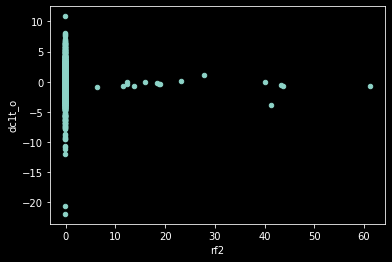

In [27]:
sign.plot.scatter('rf1','dc1t_o')

sign.plot.scatter('dv1t_o','dc1t_o')
plt.plot(sign.dv1t_o.mean(),sign.dc1t_o.mean(),color='r',marker='o')
plt.show()

sign.plot.scatter('rf2','dc1t_o')

### Rf Study vs dv1t_o


- Resonance Factor 1
    - Reaches its max when price changes at or close to 0
    - For dv1t_o <0 rf1 is nonzero

- Resonance Factor 2
    - Reaches its max when price changes at or close to 0
    - For all other values of dv1t_o, at or close to 0

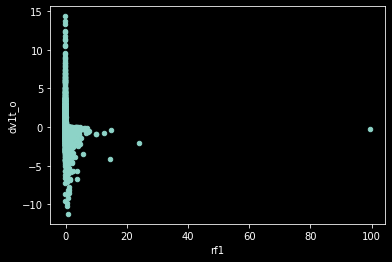

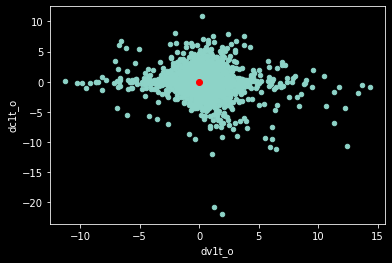

<AxesSubplot:xlabel='rf2', ylabel='dv1t_o'>

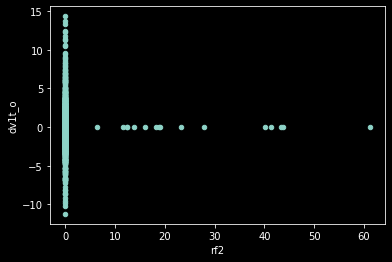

In [28]:
sign.plot.scatter('rf1','dv1t_o')

sign.plot.scatter('dv1t_o','dc1t_o')
plt.plot(sign.dv1t_o.mean(),sign.dc1t_o.mean(),color='r',marker='o')
plt.show()

sign.plot.scatter('rf2','dv1t_o')

<Figure size 1440x1440 with 0 Axes>

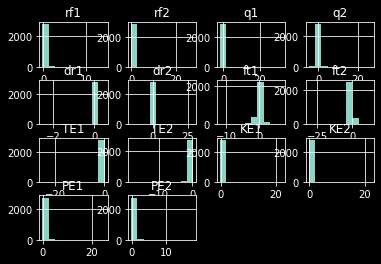

<Figure size 1440x1440 with 0 Axes>

In [37]:
sign[['rf1','rf2','q1','q2','dr1','dr2','ft1','ft2','TE1','TE2','KE1','KE2','PE1','PE2']][sign.idpos1==1].hist()
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

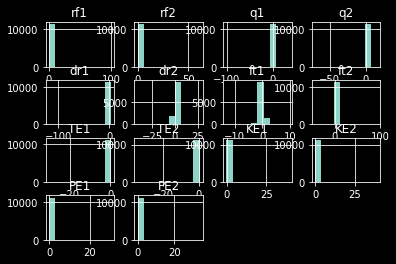

<Figure size 1440x1440 with 0 Axes>

In [38]:
sign[['rf1','rf2','q1','q2','dr1','dr2','ft1','ft2','TE1','TE2','KE1','KE2','PE1','PE2']][sign.idpos1==0].hist()
plt.figure(figsize=(20,20))

<AxesSubplot:>

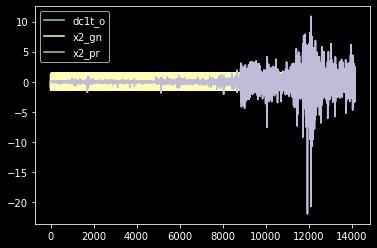

In [49]:
t = 1-(sign.x2_pr/sign.x2_gn)
sign[['dc1t_o','x2_gn','x2_pr']].plot()